# Advent of code 2020: Day 7

## Import

In [1]:
import math as M
import collections as C
import bahnslib as B
from itertools import combinations
import requests

day = 7

if open(f"../inputs/{str(day).zfill(2)}.txt", "r+").read() == "":
    url = f"https://adventofcode.com/2020/day/{day}/input"
    id = open("../downloader/session_id.txt", "r").readline().strip()
    cookies = {
        "session": id
    }
    r = requests.post(url, cookies=cookies, allow_redirects=True)
    open(f"../inputs/{str(day).zfill(2)}.txt", "w").write(r.text)

file = open(f"../inputs/{str(day).zfill(2)}.txt", "r")
data = [*map(str.rstrip, file.readlines())]
file.close()

Create a dictionary of bags and their contents

In [2]:
contents_of = {}
containing = {}
all_colours = set()
sub_colours = set()
grandparents = set()
grandchildren = set()

for line in data:
    parent, children = line[:-1].split(" bags contain ")
    all_colours.add(parent)
    children = children.replace("bags", "").replace("bag", "").split(", ")
    contents_of[parent] = {}
    for child in children:
        child = child.split()
        colour = " ".join(child[1:])
        if child != ["no", "other"]:
            sub_colours.add(colour)
            count = int(child[0])
            contents_of[parent][colour] = count 
            if colour in containing:
                containing[colour].add(parent)
            else:
                containing[colour] = {parent}
        else:
            grandchildren.add(parent)

grandparents = all_colours - sub_colours
for grandparent in grandparents:
    containing[grandparent] = []

## Part 1

In [3]:
parents = set()
def get_parents(colour):
    for parent in containing[colour]:
        parents.add(parent)
        get_parents(parent)
get_parents("shiny gold")

print(len(parents))


259


## Part 2

In [4]:
def get_children(colour, weight):
    t = 1
    for bag in contents_of[colour]:
        t += get_children(bag, contents_of[colour][bag])
    return t * weight

print(get_children("shiny gold", 1) - 1)


45018


## And now for some unnecessary bits and pieces

### Bad graphing

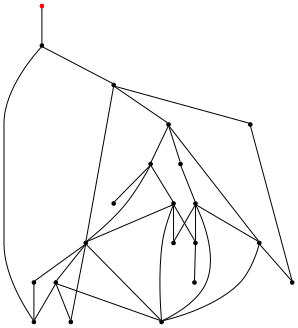

In [7]:
from graphviz import Digraph, Graph

node_shape = "point"
graphed_children = set()
graphed_parents = set()
dot = Graph(engine="dot", format="png")
dot.node("shiny gold", fillcolor="red", color="red")

def graph_children(colour):
    dot.node(colour, shape=node_shape)
    for bag in contents_of[colour]:
        dot.node(bag, shape=node_shape)
        dot.edge(colour, bag)
        if bag not in graphed_children:
            graph_children(bag)
    graphed_children.add(colour)

def graph_parents(colour):
    dot.node(colour, shape=node_shape)
    for parent in containing[colour]:
        dot.node(parent, shape=node_shape)
        dot.edge(parent, colour)
        if parent not in graphed_parents:
            graph_parents(parent)
    graphed_parents.add(colour)

# for grandparent in grandparents:
#     graph_children(grandparent)
    
graph_children("shiny gold")
# graph_parents("shiny gold")

# print(len(g.nodes()))
dot.render("temp.gv")
dot

### An unnecessarily complex implementation

In [6]:
class Colour():
    def __init__(self, name):
        self.name = name
        self.parents = set()
        self.children = set()
    
    def add_child(self, child):
        self.children.add(child)
        
    def add_parent(self, parent):
        self.parents.add(parent)